In [1]:
import matplotlib.pyplot as plt # For plots
import seaborn as sns # For graphs

import pandasql as ps # SQL package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
file_path = os.path.join(dirname, filenames[0])

/kaggle/input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv


In [3]:
# Load csv file into dataframe
df = pd.read_csv(file_path)

# Shape of dataset
print(f'Shape of dataset: {df.shape}')

# Print head
df.head()

Shape of dataset: (36, 8)


,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio
0,Andaman and Nicobar,7620,9,7482,129,0.12,98.19,1.69
1,Andhra Pradesh,2049314,11655,2023496,14163,0.57,98.74,0.69
2,Arunachal Pradesh,54572,440,53856,276,0.81,98.69,0.51
3,Assam,601787,4487,591432,5868,0.75,98.28,0.98
4,Bihar,725952,55,716237,9660,0.01,98.66,1.33


In [4]:
# Random sample of 5 data points
df.sample(5)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio
33,Uttar Pradesh,1709800,159,1686749,22892,0.01,98.65,1.34
29,Sikkim,31412,600,30425,387,1.91,96.86,1.23
30,Tamil Nadu,2662177,17192,2609435,35550,0.65,98.02,1.34
14,Jharkhand,348215,78,343002,5135,0.02,98.50,1.47
9,Goa,176318,830,172176,3312,0.47,97.65,1.88


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [6]:
# Describe the data
df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,9.372217e+05,7695.000000,9.170805e+05,12446.166667,1.030278,97.701389,1.269167
std,1.390444e+06,24646.215749,1.352600e+06,23881.438834,2.988429,2.874051,0.566061
min,7.620000e+03,0.000000,7.482000e+03,4.000000,0.000000,81.690000,0.040000
25%,8.338550e+04,145.750000,7.767900e+04,817.500000,0.037500,97.612500,0.962500
50%,4.749075e+05,416.000000,4.638995e+05,5501.500000,0.420000,98.315000,1.305000
75%,1.010462e+06,4520.250000,9.967520e+05,13714.500000,0.705000,98.682500,1.575000
max,6.547793e+06,144075.000000,6.368530e+06,139011.000000,17.980000,99.960000,2.740000


In [7]:
# Rename column names for ease in SQL query
df.columns = ['state', 'total', 'active', 'discharged', 'deaths', 'active_ratio', 'discharge_ratio', 'death_ratio']
print(f'Column names: {df.columns}')

Column names: Index(['state', 'total', 'active', 'discharged', 'deaths', 'active_ratio',
       'discharge_ratio', 'death_ratio'],
      dtype='object')


## HeatMap for the correlation matrix of Covid data

Text(0.5, 1.0, 'HeatMap')

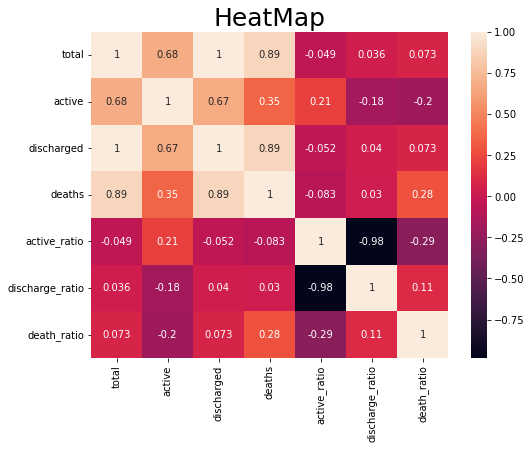

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.title('HeatMap', fontsize=25)

### Strong positive correlations:  
- Total cases and Discharged
- Total cases and Deaths
- Discharged and Deaths

### Strong negative correlations:
- Discharge Ration (%) and Active Ration (%)

Text(0.5, 1.0, 'Death Ratio per State')

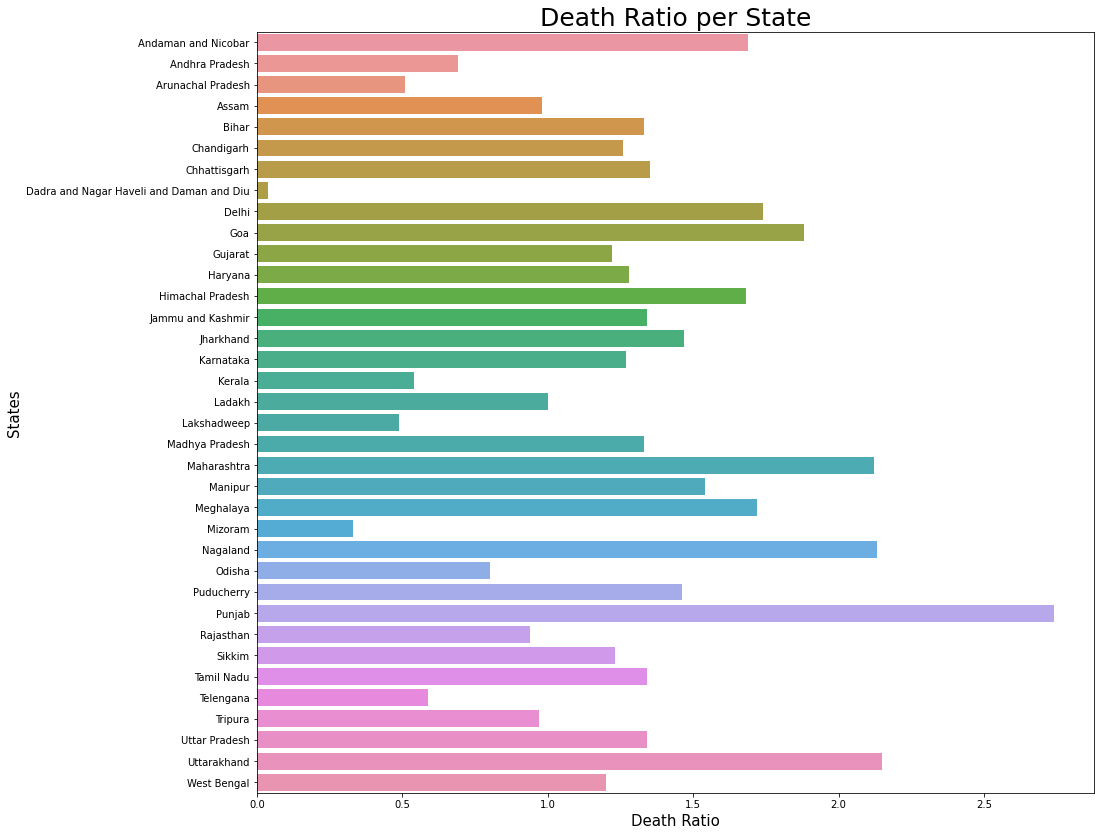

In [9]:
plt.figure(figsize=(15,14))
sns.barplot(y='state', x='death_ratio', data=df)
plt.xlabel("Death Ratio",fontsize=15)
plt.ylabel("States",fontsize=15)
plt.title("Death Ratio per State",fontsize=25)

## Bar Graphs for top tens in every field
Here we will plot the bar graphs of fields like total cases, active, discharged etc wrt top ten states/UTs to understand the rate of spread of Covid cases in every region

Text(0.5, 1.0, 'Total Cases for top ten states')

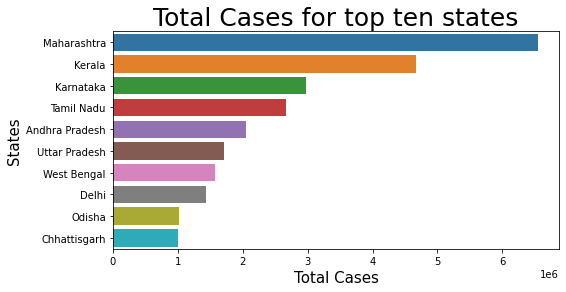

In [10]:
# Bar graph of top number of cases
top_ten_total_cases = df.nlargest(10, 'total')

plt.figure(figsize=(8,4))
sns.barplot(y='state', x='total', orient='h', data=top_ten_total_cases)
plt.xlabel("Total Cases",fontsize=15)
plt.ylabel("States",fontsize=15)
plt.title("Total Cases for top ten states",fontsize=25)

Text(0.5, 1.0, 'Active Cases for top ten states')

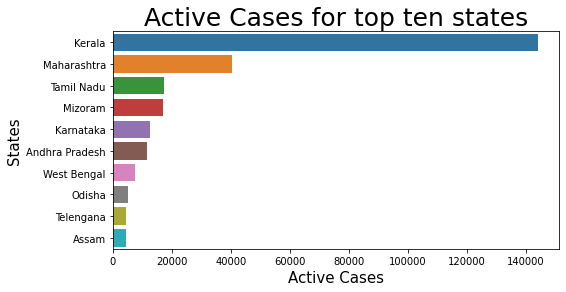

In [11]:
# Bar graph of top number of active cases
top_ten_total_cases = df.nlargest(10, 'active')

plt.figure(figsize=(8,4))
sns.barplot(y='state', x='active', orient='h', data=top_ten_total_cases)
plt.xlabel("Active Cases", fontsize=15)
plt.ylabel("States", fontsize=15)
plt.title("Active Cases for top ten states", fontsize=25)

Text(0.5, 1.0, 'Discharged Cases for top ten states')

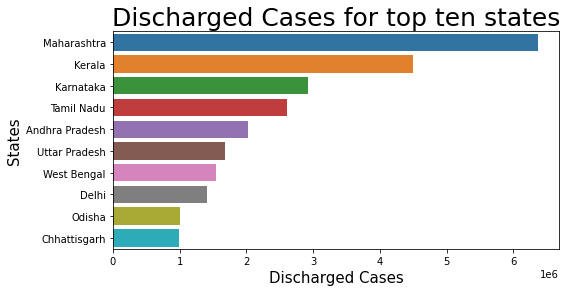

In [12]:
# Bar graph of top number of discharged cases
top_ten_total_cases = df.nlargest(10, 'discharged')

plt.figure(figsize=(8,4))
sns.barplot(y='state', x='discharged', orient='h', data=top_ten_total_cases)
plt.xlabel("Discharged Cases", fontsize=15)
plt.ylabel("States", fontsize=15)
plt.title("Discharged Cases for top ten states", fontsize=25)

Text(0.5, 1.0, 'Deaths for top ten states')

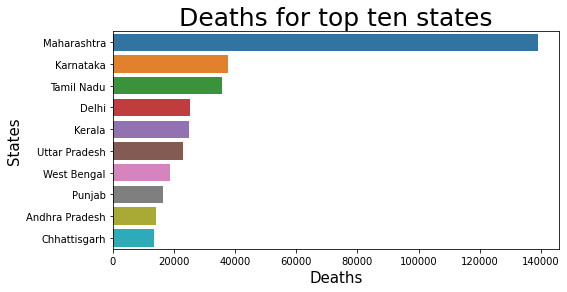

In [13]:
# Bar graph of top number of deaths
top_ten_total_cases = df.nlargest(10, 'deaths')

plt.figure(figsize=(8,4))
sns.barplot(y='state', x='deaths', orient='h', data=top_ten_total_cases)
plt.xlabel("Deaths", fontsize=15)
plt.ylabel("States", fontsize=15)
plt.title("Deaths for top ten states", fontsize=25)

Text(0.5, 1.0, 'Active Ratio in percent for top ten states')

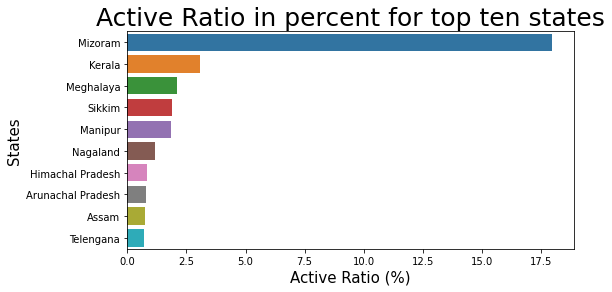

In [14]:
# Bar graph of top ratio of active cases
top_ten_total_cases = df.nlargest(10, 'active_ratio')

plt.figure(figsize=(8,4))
sns.barplot(y='state', x='active_ratio', orient='h', data=top_ten_total_cases)
plt.xlabel("Active Ratio (%)", fontsize=15)
plt.ylabel("States", fontsize=15)
plt.title("Active Ratio in percent for top ten states", fontsize=25)

Text(0.5, 1.0, 'Discharge ratio in percent for top ten states')

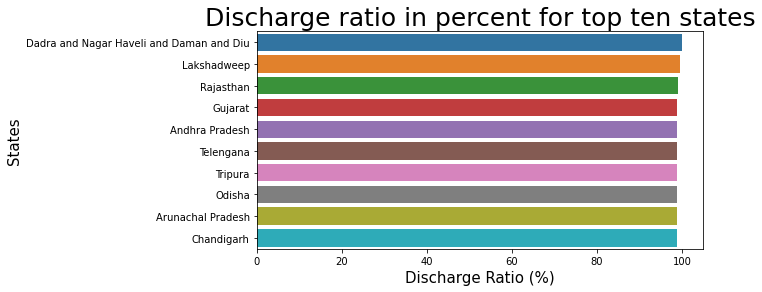

In [15]:
# Bar graph of top ratio of discharge cases
top_ten_total_cases = df.nlargest(10, 'discharge_ratio')

plt.figure(figsize=(8,4))
sns.barplot(y='state', x='discharge_ratio', orient='h', data=top_ten_total_cases)
plt.xlabel("Discharge Ratio (%)", fontsize=15)
plt.ylabel("States", fontsize=15)
plt.title("Discharge ratio in percent for top ten states", fontsize=25)

### Conclusion
- Total cases - Maharashtra
- Active - Kerala
- Discharged - Maharashtra
- Deaths - Maharashtra
- Active Ratio (%) - Mizoram
- Discharge Ratio (%) - Dadra and Nagar Haveli and Daman and Diu	

In [16]:
##### For practice purpose only

q1 = """SELECT state, total
FROM df """
data = ps.sqldf(q1, locals())
data.head()

,state,total
0,Andaman and Nicobar,7620
1,Andhra Pradesh,2049314
2,Arunachal Pradesh,54572
3,Assam,601787
4,Bihar,725952
